# REGRESSION ANALYSIS

In [17]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

import dmba
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import seaborn as sns

%matplotlib inline

In [18]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df.shape

(788, 20)

In [19]:
print(redfin_df.isnull().sum())

Unnamed: 0                   0
Estimated_market_value       0
Selling_Price                0
Date_Sold                   74
Estimated_Monthly_Cost       2
Estimated_Rental_Value       0
Zipcode                      0
Beds                         0
Bathrooms                    0
Square_Feet                  0
Address                      0
Year_Built                   0
Price_Per_Sqft               1
Lot_Size                     0
Parking_Spaces               0
Monthly_Mortgage_Payment     2
Walk_Score                   0
Estimated_Salesrange_min     0
Estimated_Salesrange_max     0
Company_Adj                  1
dtype: int64


In [20]:
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [21]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN
redfin_df

,Unnamed: 0,Estimated_market_value,Selling_Price,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Address,Year_Built,Lot_Size,Parking_Spaces,Walk_Score,Estimated_Salesrange_min,Estimated_Salesrange_max,Company_Adj
0,0,2260062,1950000,5263.43,95070,3,2.0,1249,10612 Gascoigne Dr,1955,5073.00,1,22,2150000.0,2550000.0,Apple_Adj
1,1,1723047,1850000,4115.00,95070,3,2.5,1598,20579 Cedarbrook Ter,1977,2133.00,2,57,1640000.0,1950000.0,Apple_Adj
2,2,1629260,1685000,5374.13,95014,3,2.0,1487,20239 Northwest Sq,1973,1344.00,2,64,1550000.0,1840000.0,Apple
3,3,1813091,1830000,4848.10,94024,3,2.5,1670,10280 Park Green Ln #850,2006,984.00,2,84,1720000.0,2050000.0,Alphabet_Adj
4,4,1163353,1090000,3407.00,95015,3,2.0,1491,10090 Pasadena Ave Unit A4,1985,38577.88,1,73,1110000.0,1320000.0,Apple_Adj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,783,1625000,1625000,4096.00,95125,3,2.0,1716,1018 Pine,1953,6440.00,2,53,1720000.0,2050000.0,Netflix_Adj
783,784,2258708,1765000,4894.00,95125,3,3.0,2231,1466 Gerhardt Ave,1958,8426.00,9999,49,2150000.0,2550000.0,Netflix_Adj
784,785,1229202,1350000,3711.00,95131,3,2.5,1464,1929 Garden Bing Cir,1984,3150.00,6,67,1170000.0,1390000.0,Netflix_Adj
785,786,1074256,1000000,2807.00,95111,3,2.0,990,4883 Snow Dr,1962,7337.00,9999,60,1020000.0,1210000.0,Apple_Adj


In [22]:
values = [30]# remove the rows for bedrooms that are not equal to 3
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [23]:
redfin_df.columns

Index(['Unnamed: 0', 'Estimated_market_value', 'Selling_Price',
       'Estimated_Rental_Value', 'Zipcode', 'Beds', 'Bathrooms', 'Square_Feet',
       'Address', 'Year_Built', 'Lot_Size', 'Parking_Spaces', 'Walk_Score',
       'Estimated_Salesrange_min', 'Estimated_Salesrange_max', 'Company_Adj'],
      dtype='object')

In [24]:
formula = 'Selling_Price ~ Company_Adj' # Regression to see the correlation between selling price and Company_Adj
redfin_lm = sm.ols(formula=formula, data=redfin_df).fit()
summary_table = redfin_lm.summary()
print(redfin_lm.summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     11.47
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           1.05e-10
Time:                        11:42:34   Log-Likelihood:                -11780.
No. Observations:                 786   AIC:                         2.357e+04
Df Residuals:                     780   BIC:                         2.360e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

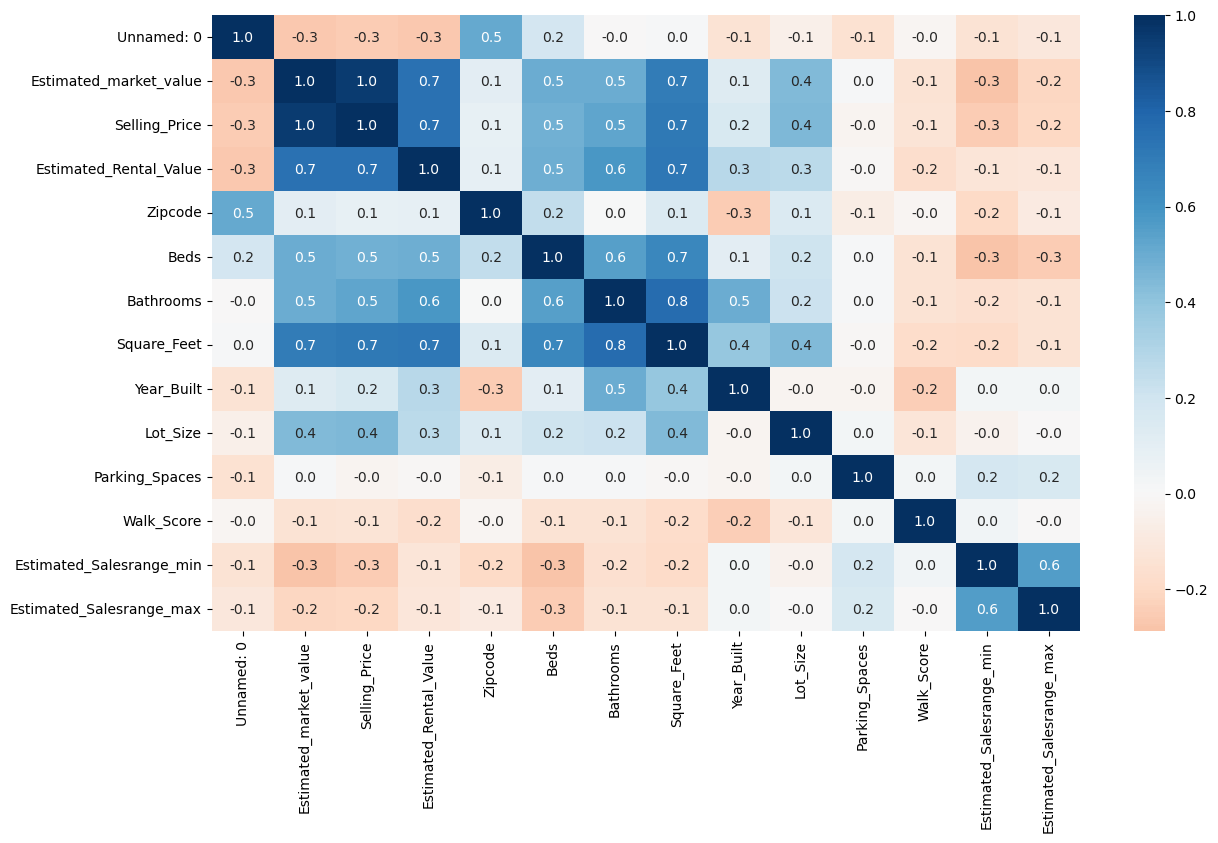

In [25]:
corr = redfin_df.corr() # getting the heatmap to check whether other variables may have an effect on selling price
fig, ax = plt.subplots()
fig.set_size_inches(14, 8)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()#show heatmap of the dataset

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [28]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [29]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [30]:
#Creating the linear regression model
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred = linear_model.predict(X_test_scaled)

In [31]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -17784.6514
       Root Mean Squared Error (RMSE) : 234249.5252
            Mean Absolute Error (MAE) : 152556.4885
          Mean Percentage Error (MPE) : -1.7623
Mean Absolute Percentage Error (MAPE) : 8.2442


In [35]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [37]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [38]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [39]:
#Creating the Gradient Boosting model
from sklearn.preprocessing import StandardScaler
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [40]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -10004.4723
       Root Mean Squared Error (RMSE) : 184862.6623
            Mean Absolute Error (MAE) : 135681.6907
          Mean Percentage Error (MPE) : -1.5243
Mean Absolute Percentage Error (MAPE) : 7.5131


# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [42]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [43]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [44]:
#Creating the model
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [45]:
regressionSummary(y_test, y_pred)


Regression statistics

                      Mean Error (ME) : -50577.0881
       Root Mean Squared Error (RMSE) : 244942.3779
            Mean Absolute Error (MAE) : 166767.5338
          Mean Percentage Error (MPE) : -3.3805
Mean Absolute Percentage Error (MAPE) : 9.0075


# Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [47]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [48]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [49]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [50]:
#Creating the model
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


lasso_model = Lasso(alpha=0.05, max_iter=10000)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

In [51]:
regressionSummary(y_test, lasso_predictions)


Regression statistics

                      Mean Error (ME) : -17784.7230
       Root Mean Squared Error (RMSE) : 234249.4664
            Mean Absolute Error (MAE) : 152556.4234
          Mean Percentage Error (MPE) : -1.7623
Mean Absolute Percentage Error (MAPE) : 8.2441


In [52]:
selected_features = [feature for feature, coefficient in zip(predictors, lasso_model.coef_) if coefficient != 0]
selected_features

['Company_Adj',
 'Beds',
 'Bathrooms',
 'Square_Feet',
 'Year_Built',
 'Lot_Size',
 'Estimated_market_value',
 'Estimated_Rental_Value',
 'Estimated_Salesrange_min',
 'Parking_Spaces',
 'Walk_Score',
 'Estimated_Salesrange_max']

#  Ridge Regression

In [53]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [54]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [55]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [56]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [57]:
#Creating the model
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

# partition data
X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_model = Ridge(alpha=10.0)  
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

In [58]:
regressionSummary(y_test, ridge_predictions)


Regression statistics

                      Mean Error (ME) : -18447.9923
       Root Mean Squared Error (RMSE) : 231140.2980
            Mean Absolute Error (MAE) : 153246.9471
          Mean Percentage Error (MPE) : -1.9717
Mean Absolute Percentage Error (MAPE) : 8.2916


# Cross Validation

In [59]:
redfin_df = pd.read_csv('cleaned_data3.csv')
redfin_df = redfin_df.dropna(subset=['Company_Adj'])
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

787

In [60]:
redfin_df = redfin_df.dropna(axis=1) #dropping columns that have NaN

In [61]:
values = [30]# remove the outlier
redfin_df = redfin_df[redfin_df.Beds.isin(values) == False]
redfin_df = redfin_df.reset_index(drop=True)
redfin_df
redfin_df.shape[0]

786

In [62]:
predictors = ['Company_Adj', 'Beds', 'Bathrooms', 'Square_Feet','Year_Built','Lot_Size', 
              'Estimated_market_value','Estimated_Rental_Value','Estimated_Salesrange_min', 'Parking_Spaces',
              'Walk_Score', 'Estimated_Salesrange_max']
outcome = 'Selling_Price'

X = pd.get_dummies(redfin_df[predictors], drop_first=True)
y = redfin_df[outcome]

In [63]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

# Define your regression models
models = [
    LinearRegression(),
    Lasso(alpha=1.0, max_iter=10000),
    Ridge(alpha=10.0),
    RandomForestRegressor(n_estimators=100, random_state=0),
    XGBRegressor(n_estimators=100, objective='reg:squarederror')
]

In [64]:
# Initialize lists to store model names and cross-validation percentage R-squared scores
model_names = []
mean_r2_scores = []

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the feature data
X_scaled = scaler.fit_transform(X)

# Calculate the baseline R-squared (e.g., mean of the target variable)
baseline_r2 = r2_score(y, np.full_like(y, y.mean()))

# Define the number of folds for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for each regression model
for model in models:
    # Calculate R-squared scores for the model using cross-validation
    scores = cross_val_score(model, X_scaled, y, cv=kfold, scoring='r2')
    
    # Calculate the mean R-squared score
    mean_r2 = scores.mean()
    
    # Get the model name
    model_name = model.__class__.__name__
    model_names.append(model_name)
    
    # Store the mean R-squared score
    mean_r2_scores.append(mean_r2)

# Create a DataFrame
data = {
    'Model': model_names,
    'Mean R-squared (%)': [f'{r2 * 100:.2f}' for r2 in mean_r2_scores],
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                   Model Mean R-squared (%)
0       LinearRegression              90.53
1                  Lasso              90.53
2                  Ridge              90.53
3  RandomForestRegressor              90.97
4           XGBRegressor              90.20


# STATISTICAL TESTING


In [65]:
import pandas as pd
from scipy.stats import ranksums
from scipy import stats

In [66]:
df = pd.read_excel('cleaned_data.xlsx', sheet_name = "Sheet1").drop("ID", axis = 1)
df

,Estimated_market_value,Selling_Price,Date_Sold,Estimated_Monthly_Cost,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Address,...,Laundry,Flooring,Roof,Fencing,Walk_Score,Transit_Score,Bike_Score,Estimated_Salesrange_min,Estimated_Salesrange_max,Company_Adj
0,2260062,1950000,11192021.0,10536.000000,5263.43,95070,3,2.0,1249,10612 Gascoigne Dr,...,Description: Wood-Burning,(Minimum): 1,res: 0.1165,Primary ID: 671132,22,35,75,2150000.0,2550000.0,Apple_Adj
1,1723047,1850000,5172022.0,8632.000000,4115.00,95070,3,2.5,1598,20579 Cedarbrook Ter,...,Description: Gas Log,entral Forced Air,"Sq. Ft.: 1,598",: Vaulted Ceiling,57,or,or,1640000.0,1950000.0,Apple_Adj
2,1629260,1685000,632022.0,8258.000000,5374.13,95014,3,2.0,1487,20239 Northwest Sq,...,Central Forced Air,entral Forced Air (Gas),escription: Community Facility,NaN,64,or,or,1550000.0,1840000.0,Apple
3,1813091,1830000,152022.0,8968.000000,4848.10,94024,3,2.5,1670,10280 Park Green Ln #850,...,Slab,"Ft.: 1,670",ze Source: Assessor,Area Maximum Units: Sq. Ft.,84,48,76,1720000.0,2050000.0,Alphabet_Adj
4,1163353,1090000,3112022.0,5342.000000,3407.00,95015,3,2.0,1491,10090 Pasadena Ave Unit A4,...,Central Forced Air,entral Forced Air (Gas),ze Source: Assessor,Primary ID: 644619,73,41,74,1110000.0,1320000.0,Apple_Adj
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,1815000,1815000,9112023.0,13173.000000,4043.73,94043,3,3.0,1692,1363 West Middlefield Rd,...,Primary ID: 697852,ns: Age (No Restrictions),Individual Water Meter,: Individual Electric Meters,59,or,or,1730000.0,2060000.0,Alphabet
840,2541248,2520000,NaN,15963.000000,5470.00,95032,3,3.0,2012,16926 Roberts Rd,...,"Ft: 5,383",Number: 31,ment Year: 2023,e Description: RESID SINGLE FAMILY,83,or,or,2420000.0,2870000.0,Netflix
841,1775000,1775000,982023.0,10712.034483,4979.00,95032,3,3.0,2152,115 Rio Vis,...,"escription: Cooktop (Gas), Dishwasher, Island,...","nside, Washer/Dryer",Tile,"Forced Air, Gas",39,60,or,1710000.0,2040000.0,Netflix
842,1702000,1702000,8312023.0,17807.000000,4344.00,94043,3,3.5,1552,213 Orbit Way #114,...,". Ft.: 1,552",Type: Condominium Ownership,: ML,Source: Assessor,35,or,or,1620000.0,1930000.0,Alphabet


In [67]:
apple_adj = df[df['Company_Adj']== "Apple_Adj"][df["Beds"] == 3]
apple = df[df['Company_Adj']== "Apple"][df["Beds"] == 3]

C:\Users\aqeel\AppData\Local\Temp\ipykernel_20216\2133282499.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  apple_adj = df[df['Company_Adj']== "Apple_Adj"][df["Beds"] == 3]
C:\Users\aqeel\AppData\Local\Temp\ipykernel_20216\2133282499.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  apple = df[df['Company_Adj']== "Apple"][df["Beds"] == 3]


In [70]:
netflix = df[df['Company_Adj']== "Netflix"][df["Beds"] == 3]
netflix_adj = df[df['Company_Adj']== "Netflix_Adj"][df["Beds"] == 3]

C:\Users\aqeel\AppData\Local\Temp\ipykernel_20216\3133015443.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  netflix = df[df['Company_Adj']== "Netflix"][df["Beds"] == 3]
C:\Users\aqeel\AppData\Local\Temp\ipykernel_20216\3133015443.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  netflix_adj = df[df['Company_Adj']== "Netflix_Adj"][df["Beds"] == 3]


In [71]:
alphabet = df[df['Company_Adj']== "Alphabet"][df["Beds"] == 3]
alphabet_adj = df[df['Company_Adj']== "Alphabet_Adj"][df["Beds"] == 3]

C:\Users\aqeel\AppData\Local\Temp\ipykernel_20216\2912741554.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alphabet = df[df['Company_Adj']== "Alphabet"][df["Beds"] == 3]
C:\Users\aqeel\AppData\Local\Temp\ipykernel_20216\2912741554.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  alphabet_adj = df[df['Company_Adj']== "Alphabet_Adj"][df["Beds"] == 3]


In [72]:
all_faang = pd.concat([apple,netflix,alphabet])
all_adj = pd.concat([apple_adj,netflix_adj,alphabet_adj])

# 2 sample T test
Assuming samples are independent and normally distributed.

𝐻0:𝜇1=𝜇2𝐻𝛼:𝜇1≠𝜇2
This tests whether the difference in sample means are statistically significant.

Checking Variances
2 sample T-test requires the information on whether the variances are equal. Lower statistic below signifies more similar variance.

In [73]:
#Checking variance between all FAANG companies and FAANG companies adjacent
res = stats.levene(all_faang['Selling_Price'], all_adj['Selling_Price'])
res.statistic

1.0428882256917271

In [74]:
#Checking variance between Netflix and Netflix adjacent
res = stats.levene(netflix['Selling_Price'], netflix_adj['Selling_Price'])
res.statistic

4.759517526091922

In [75]:
#Checking variance between Apple and Apple adjacent
res = stats.levene(apple['Selling_Price'], apple_adj['Selling_Price'])
res.statistic

4.4161247327690845

In [76]:
#Checking variance between Alphabet and Alphabet adjacent
res = stats.levene(alphabet['Selling_Price'], alphabet_adj['Selling_Price'])
res.statistic

4.189512120705933

# Running T-test
Using a significance level of 5%, if the p-value is less than 0.05 we can reject the null hypothesis and conclude that there is a statistically significant difference between the average price of homes in FAANG zipcodes and average price homes in FAANG adjacent zipcodes

In [77]:
#Testing average price of all FAANG companies vs average price of all FAANG adjacent 
ttest1 = stats.ttest_ind(all_faang['Selling_Price'], all_adj['Selling_Price'], equal_var = False)
ttest1.pvalue
#Since p-value is not less than 0.05, we cannot reject the null 
#There is no statistical difference in average price between all FAANG homes and all FAANG adjacent homes

0.05751917896564973

In [78]:
#Testing average price of Netflix vs average price of Netflix adjacent 
ttest2 = stats.ttest_ind(netflix['Selling_Price'], netflix_adj['Selling_Price'],equal_var = False)
ttest2.pvalue
#Since p-value is less than 0.05, we can reject the null 
#There is a statistical difference in average price between Netflix homes and Netflix adjacent homes

0.030323738766985388

In [79]:
#Testing average price of Apple vs average price of Apple adjacent 
ttest3 = stats.ttest_ind(apple['Selling_Price'], apple_adj['Selling_Price'],equal_var = False)
ttest3.pvalue
#Since p-value is not less than 0.05, we cannot reject the null 
#There is no statistical difference in average price between Apple homes and Apple adjacent homes

0.07166847366714901

In [80]:
#Testing average price of Alphabet vs average price of Alphabet adjacent 
ttest4 = stats.ttest_ind(alphabet['Selling_Price'], alphabet_adj['Selling_Price'],equal_var = False)
ttest4.pvalue
#Since p-value is less than 0.05, we can reject the null 
#There is a statistical difference in average price between Apple homes and Apple adjacent homes

0.013340435055134544

# Wilcoxon Rank Sums
Since the T-test requires the data to be normally distributed and we cannot verify that, Wilcoxon is a nonparamaetric test that does not require the data to be normally distributed. Due to this, we cannot compare means but medians instead.

𝐻0:𝜃1=𝜃2𝐻𝛼:𝜃1≠𝜃2
Again with a significance level of 5% if the p-value is less than 0.05 we can reject the null hypothesis.

In [81]:
#Testing median price of all FAANG companies homes vs median price of all FAANG adjacent homes
ranksums(all_faang['Selling_Price'], all_adj['Selling_Price'])
#Since p-value is less than 0.05, we can reject the null 
#There is a statistical difference in median price between all FAANG homes and all FAANG adjacent homes

RanksumsResult(statistic=2.07592462882793, pvalue=0.037900922447388456)

In [82]:
#Testing median price of Netflix homes vs median price of Netflix adjacent homes
ranksums(netflix['Selling_Price'], netflix_adj['Selling_Price'])
#Since p-value is less than 0.05, we can reject the null 
#There is a statistical difference in median price between Netflix and Netflix adjacent homes

RanksumsResult(statistic=2.3120239067653574, pvalue=0.020776365899404434)

In [83]:
#Testing median price of Apple homes vs median price of Netflix adjacent homes
ranksums(apple['Selling_Price'], apple_adj['Selling_Price'])
#Since p-value is not less than 0.05, we cannot reject the null 
#There is no statistical difference in median price between Apple and Apple adjacent homes

RanksumsResult(statistic=1.3426729701458433, pvalue=0.1793778907857816)

In [84]:
#Testing median price of Alphabet homes vs median price of Alphabet adjacent homes
ranksums(alphabet['Selling_Price'], alphabet_adj['Selling_Price'])
#Since p-value is less than 0.05, we can reject the null 
#There is a statistical difference in median price between Alphabet and Alphabet adjacent homes

RanksumsResult(statistic=-2.491651470771953, pvalue=0.012715073832086886)

# DATA VISUALIZATION


In [111]:
from pathlib import Path # to interact with file system.

import numpy as np # for working with arrays.
import pandas as pd # for working with data frames (tables).

from sklearn.model_selection import train_test_split # for data partition.
from sklearn.metrics import r2_score # to identify r_squared for regression model.
from sklearn.linear_model import LinearRegression # for linear regression model.


import matplotlib.pylab as plt

In [112]:
sc_df = pd.read_excel('cleaned_data3.xlsx')

In [113]:
#dosplay the number of rows and columns
sc_df.shape

(787, 20)

In [114]:
sc_df.head()
# Display the first five rows of the dataframe.

,Unnamed: 0,Estimated_market_value,Selling_Price,Date_Sold,Estimated_Monthly_Cost,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Address,Year_Built,Price_Per_Sqft,Lot_Size,Parking_Spaces,Monthly_Mortgage_Payment,Walk_Score,Estimated_Salesrange_min,Estimated_Salesrange_max,Company_Adj
0,0,2260062,1950000,11192021.0,10536.0,5263.43,95070,3,2.0,1249,10612 Gascoigne Dr,1955,1561.0,5073.00,1,7724.0,22,2150000.0,2550000.0,['Apple_Adj']
1,1,1723047,1850000,5172022.0,8632.0,4115.00,95070,3,2.5,1598,20579 Cedarbrook Ter,1977,1158.0,2133.00,2,6211.0,57,1640000.0,1950000.0,['Apple_Adj']
2,2,1629260,1685000,632022.0,8258.0,5374.13,95014,3,2.0,1487,20239 Northwest Sq,1973,1133.0,1344.00,2,6053.0,64,1550000.0,1840000.0,['Apple']
3,3,1813091,1830000,152022.0,8968.0,4848.10,94024,3,2.5,1670,10280 Park Green Ln #850,2006,1096.0,984.00,2,6574.0,84,1720000.0,2050000.0,['Alphabet_Adj']
4,4,1163353,1090000,3112022.0,5342.0,3407.00,95015,3,2.0,1491,10090 Pasadena Ave Unit A4,1985,731.0,38577.88,1,3916.0,73,1110000.0,1320000.0,['Apple_Adj']


In [115]:
# Display the last five rows of the dataframe.
sc_df.tail()

,Unnamed: 0,Estimated_market_value,Selling_Price,Date_Sold,Estimated_Monthly_Cost,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Address,Year_Built,Price_Per_Sqft,Lot_Size,Parking_Spaces,Monthly_Mortgage_Payment,Walk_Score,Estimated_Salesrange_min,Estimated_Salesrange_max,Company_Adj
782,783,1625000,1625000,3312023.0,7625.785714,4096.0,95125,3,2.0,1716,1018 Pine,1953,947.0,6440.0,2,5429.71,53,1720000.0,2050000.0,['Netflix_Adj']
783,784,2258708,1765000,NaN,8650.000000,4894.0,95125,3,3.0,2231,1466 Gerhardt Ave,1958,791.0,8426.0,9999,6341.00,49,2150000.0,2550000.0,['Netflix_Adj']
784,785,1229202,1350000,NaN,6616.000000,3711.0,95131,3,2.5,1464,1929 Garden Bing Cir,1984,922.0,3150.0,6,4850.00,67,1170000.0,1390000.0,['Netflix_Adj']
785,786,1074256,1000000,NaN,4901.000000,2807.0,95111,3,2.0,990,4883 Snow Dr,1962,1010.0,7337.0,9999,3592.00,60,1020000.0,1210000.0,['Apple_Adj']
786,787,2020876,1860000,NaN,8496.000000,4734.0,95120,4,3.0,2167,1069 Timbercrest Dr,1980,858.0,5981.0,9999,6062.00,68,1920000.0,2280000.0,['Netflix_Adj']


In [116]:
sc_df.columns

Index(['Unnamed: 0', 'Estimated_market_value', 'Selling_Price', 'Date_Sold',
       'Estimated_Monthly_Cost', 'Estimated_Rental_Value', 'Zipcode', 'Beds',
       'Bathrooms', 'Square_Feet', 'Address', 'Year_Built', 'Price_Per_Sqft',
       'Lot_Size', 'Parking_Spaces', 'Monthly_Mortgage_Payment', 'Walk_Score',
       'Estimated_Salesrange_min', 'Estimated_Salesrange_max', 'Company_Adj'],
      dtype='object')

In [117]:
sc_df.loc[0:7]

,Unnamed: 0,Estimated_market_value,Selling_Price,Date_Sold,Estimated_Monthly_Cost,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Address,Year_Built,Price_Per_Sqft,Lot_Size,Parking_Spaces,Monthly_Mortgage_Payment,Walk_Score,Estimated_Salesrange_min,Estimated_Salesrange_max,Company_Adj
0,0,2260062,1950000,11192021.0,10536.0,5263.43,95070,3,2.0,1249,10612 Gascoigne Dr,1955,1561.0,5073.00,1,7724.0,22,2150000.0,2550000.0,['Apple_Adj']
1,1,1723047,1850000,5172022.0,8632.0,4115.00,95070,3,2.5,1598,20579 Cedarbrook Ter,1977,1158.0,2133.00,2,6211.0,57,1640000.0,1950000.0,['Apple_Adj']
2,2,1629260,1685000,632022.0,8258.0,5374.13,95014,3,2.0,1487,20239 Northwest Sq,1973,1133.0,1344.00,2,6053.0,64,1550000.0,1840000.0,['Apple']
3,3,1813091,1830000,152022.0,8968.0,4848.10,94024,3,2.5,1670,10280 Park Green Ln #850,2006,1096.0,984.00,2,6574.0,84,1720000.0,2050000.0,['Alphabet_Adj']
4,4,1163353,1090000,3112022.0,5342.0,3407.00,95015,3,2.0,1491,10090 Pasadena Ave Unit A4,1985,731.0,38577.88,1,3916.0,73,1110000.0,1320000.0,['Apple_Adj']
5,5,4253377,4000000,NaN,19603.0,8730.00,95070,5,4.0,4043,10930 Miramonte Rd,1989,989.0,11047.00,9999,14369.0,33,4040000.0,4810000.0,['Apple_Adj']
6,6,5311811,4900000,11292022.0,9679.0,10332.00,95015,5,4.5,3727,10264 Judy Ave,2022,1315.0,9426.00,2,7095.0,57,5050000.0,6000000.0,['Apple_Adj']
7,7,2744767,2540000,NaN,4446.0,5374.13,95014,4,3.0,1646,1028 Bubb Rd,1963,1543.0,6000.00,9999,1123.0,28,2610000.0,3100000.0,['Apple']


In [118]:
sc_df.iloc[0:3]

,Unnamed: 0,Estimated_market_value,Selling_Price,Date_Sold,Estimated_Monthly_Cost,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Address,Year_Built,Price_Per_Sqft,Lot_Size,Parking_Spaces,Monthly_Mortgage_Payment,Walk_Score,Estimated_Salesrange_min,Estimated_Salesrange_max,Company_Adj
0,0,2260062,1950000,11192021.0,10536.0,5263.43,95070,3,2.0,1249,10612 Gascoigne Dr,1955,1561.0,5073.0,1,7724.0,22,2150000.0,2550000.0,['Apple_Adj']
1,1,1723047,1850000,5172022.0,8632.0,4115.00,95070,3,2.5,1598,20579 Cedarbrook Ter,1977,1158.0,2133.0,2,6211.0,57,1640000.0,1950000.0,['Apple_Adj']
2,2,1629260,1685000,632022.0,8258.0,5374.13,95014,3,2.0,1487,20239 Northwest Sq,1973,1133.0,1344.0,2,6053.0,64,1550000.0,1840000.0,['Apple']


In [119]:
#showing the first ten rows of the second column
sc_df['Estimated_market_value'].iloc[0:10]
sc_df.iloc[0:10]['Estimated_market_value']  
sc_df.iloc[0:10].Estimated_market_value

0    2260062
1    1723047
2    1629260
3    1813091
4    1163353
5    4253377
6    5311811
7    2744767
8    1428716
9    3343045
Name: Estimated_market_value, dtype: int64

In [120]:
#Showing the fifth row of the first 10 columns
sc_df.iloc[4][0:10]
sc_df.iloc[4, 0:10]

Unnamed: 0                        4
Estimated_market_value      1163353
Selling_Price               1090000
Date_Sold                 3112022.0
Estimated_Monthly_Cost       5342.0
Estimated_Rental_Value       3407.0
Zipcode                       95015
Beds                              3
Bathrooms                       2.0
Square_Feet                    1491
Name: 4, dtype: object

In [121]:
#combine non-consecutive columns into a new data frame
pd.concat([sc_df.iloc[4:6,1:3],sc_df.iloc[4:6,4:6]], axis=1)

,Estimated_market_value,Selling_Price,Estimated_Monthly_Cost,Estimated_Rental_Value
4,1163353,1090000,5342.0,3407.0
5,4253377,4000000,19603.0,8730.0


In [122]:
np.round(sc_df.describe())

,Unnamed: 0,Estimated_market_value,Selling_Price,Date_Sold,Estimated_Monthly_Cost,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Year_Built,Price_Per_Sqft,Lot_Size,Parking_Spaces,Monthly_Mortgage_Payment,Walk_Score,Estimated_Salesrange_min,Estimated_Salesrange_max
count,787.0,787.0,787.0,713.0,785.0,787.0,787.0,787.0,787.0,787.0,787.0,786.0,787.0,787.0,785.0,787.0,7.870000e+02,7.870000e+02
mean,394.0,2045627.0,1962617.0,5213256.0,8919.0,4396.0,94901.0,3.0,2.0,1693.0,1970.0,1201.0,8159.0,1666.0,6357.0,59.0,3.059091e+10,1.379786e+10
std,228.0,821483.0,809802.0,3961733.0,3458.0,1154.0,382.0,1.0,1.0,659.0,23.0,366.0,32093.0,3726.0,2539.0,18.0,1.561640e+11,1.059042e+11
min,0.0,234450.0,240000.0,142022.0,688.0,2146.0,94024.0,1.0,1.0,720.0,1880.0,179.0,1.0,0.0,337.0,10.0,1.000000e+06,1.010000e+06
25%,198.0,1560380.0,1483500.0,1152021.0,6910.0,3682.0,95030.0,3.0,2.0,1248.0,1955.0,954.0,5056.0,2.0,4904.0,48.0,1.560000e+06,1.820000e+06
50%,394.0,1850000.0,1788000.0,4282023.0,8506.0,4109.0,95051.0,3.0,2.0,1517.0,1961.0,1164.0,6102.0,2.0,6107.0,61.0,1.840000e+06,2.150000e+06
75%,590.0,2332139.0,2255000.0,9132023.0,10536.0,4937.0,95070.0,4.0,2.0,1931.0,1980.0,1401.0,7470.0,3.0,7544.0,71.0,2.375000e+06,2.740000e+06
max,787.0,6939912.0,7500000.0,12312021.0,33923.0,13488.0,95148.0,6.0,6.0,5122.0,2023.0,2613.0,877298.0,9999.0,24866.0,92.0,9.740000e+11,9.880000e+11


In [123]:
sc_df['Square_Feet'].describe()

count     787.000000
mean     1693.155019
std       658.748776
min       720.000000
25%      1247.500000
50%      1517.000000
75%      1931.000000
max      5122.000000
Name: Square_Feet, dtype: float64

some sampling

In [124]:
sc_df.sample(4)

,Unnamed: 0,Estimated_market_value,Selling_Price,Date_Sold,Estimated_Monthly_Cost,Estimated_Rental_Value,Zipcode,Beds,Bathrooms,Square_Feet,Address,Year_Built,Price_Per_Sqft,Lot_Size,Parking_Spaces,Monthly_Mortgage_Payment,Walk_Score,Estimated_Salesrange_min,Estimated_Salesrange_max,Company_Adj
341,342,1721312,1260000,2242023.0,6175.000000,3423.00,95050,3,2.0,1484,605 Malarin Ave,1951,849.0,5893.0,1,4526.00,67,1640000.0,1950000.0,['Netflix_Adj']
265,266,3110000,3110000,6162023.0,10924.307692,7378.00,95032,5,2.5,3212,124 Newell Ave,1964,968.0,11995.0,2,7517.46,43,3340000.0,3970000.0,['Netflix']
2,2,1629260,1685000,632022.0,8258.000000,5374.13,95014,3,2.0,1487,20239 Northwest Sq,1973,1133.0,1344.0,2,6053.00,64,1550000.0,1840000.0,['Apple']
204,205,1625000,1625000,7212023.0,12601.523810,5302.07,95030,3,2.5,2319,109 Rio Vis,1984,701.0,1956.0,2,8990.76,39,1570000.0,1870000.0,['Netflix_Adj']


 Exploring variable types

In [125]:
sc_df.columns

Index(['Unnamed: 0', 'Estimated_market_value', 'Selling_Price', 'Date_Sold',
       'Estimated_Monthly_Cost', 'Estimated_Rental_Value', 'Zipcode', 'Beds',
       'Bathrooms', 'Square_Feet', 'Address', 'Year_Built', 'Price_Per_Sqft',
       'Lot_Size', 'Parking_Spaces', 'Monthly_Mortgage_Payment', 'Walk_Score',
       'Estimated_Salesrange_min', 'Estimated_Salesrange_max', 'Company_Adj'],
      dtype='object')

In [126]:
sc_df.dtypes

Unnamed: 0                    int64
Estimated_market_value        int64
Selling_Price                 int64
Date_Sold                   float64
Estimated_Monthly_Cost      float64
Estimated_Rental_Value      float64
Zipcode                       int64
Beds                          int64
Bathrooms                   float64
Square_Feet                   int64
Address                      object
Year_Built                    int64
Price_Per_Sqft              float64
Lot_Size                    float64
Parking_Spaces                int64
Monthly_Mortgage_Payment    float64
Walk_Score                    int64
Estimated_Salesrange_min    float64
Estimated_Salesrange_max    float64
Company_Adj                  object
dtype: object

 Missing Values

In [127]:
#To illustrate missing data procedures, we first convert a few entries for date sold to NA's. 
print('Number of rows with valid Date Sold values before: ', 
      sc_df['Date_Sold'].count()) 
missingRows = sc_df.sample(10).index
sc_df.loc[missingRows, 'Date_Sold'] = np.nan
print('Number of rows with valid Date Sold values after setting to NAN: ', 
      sc_df['Date_Sold'].count()) 
sc_df['Date_Sold'].count()

Number of rows with valid Date Sold values before:  713
Number of rows with valid Date Sold values after setting to NAN:  706


706

DATASET PARTITIONING


In [128]:
#Partitioning the dataset into training (50%), validation (30%), and test sets (20%).
trainData = sc_df.sample(frac=0.5, random_state=1)
validData = sc_df.drop(trainData.index).sample(frac=0.3, random_state=1)  
testData = sc_df.drop(trainData.index).drop(validData.index)

print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test       : ', testData.shape)
print()

Training   :  (394, 20)
Validation :  (118, 20)
Test       :  (275, 20)



visualization


In [129]:
import os
import calendar
import networkx as nx
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns # Making statistical graphs on top of what matplot can do 
from sklearn import preprocessing

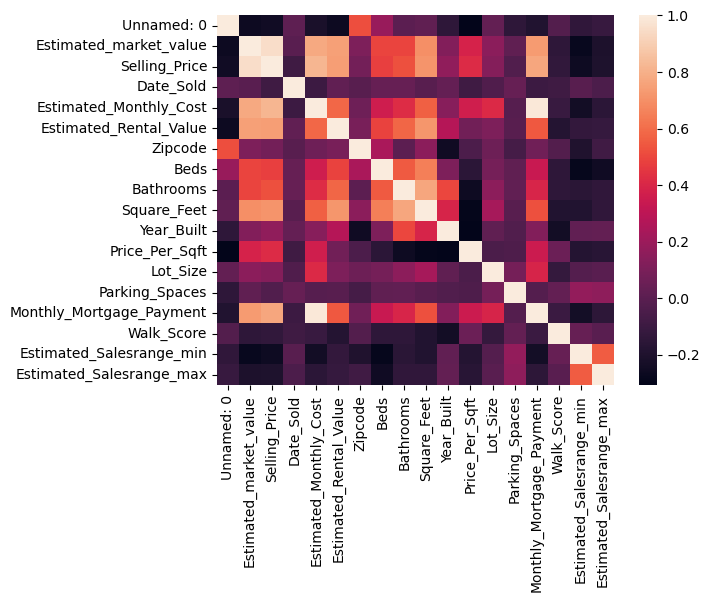

In [130]:
#8a Starting with a heatmaps to see correlation between variables
corr = sc_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

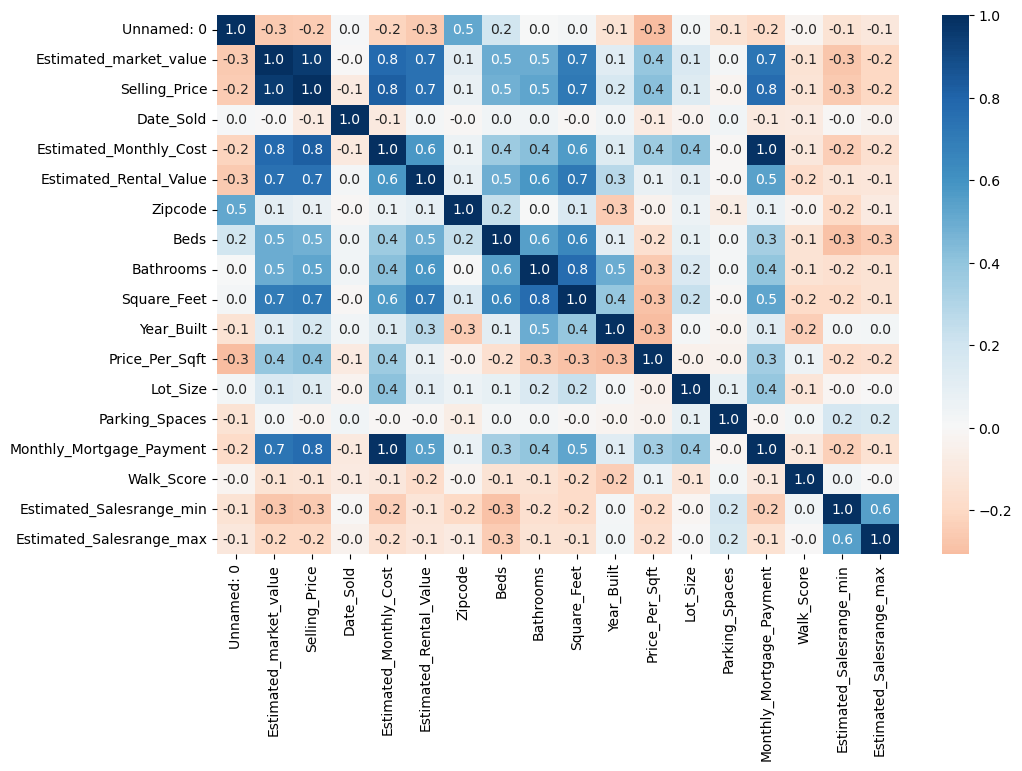

In [131]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
plt.show()

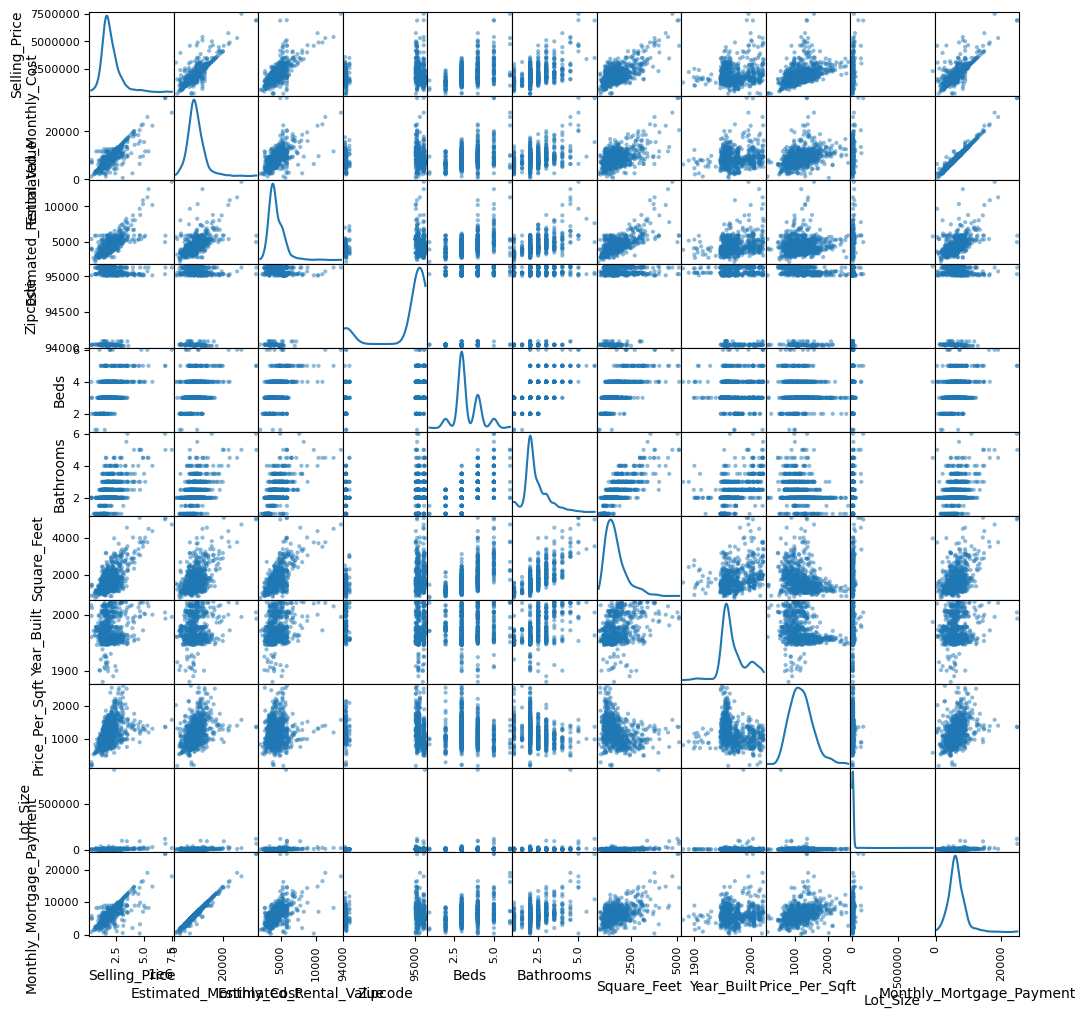

In [132]:
_ = scatter_matrix(sc_df[['Selling_Price',
       'Estimated_Monthly_Cost', 'Estimated_Rental_Value', 'Zipcode', 'Beds',
       'Bathrooms', 'Square_Feet', 'Year_Built', 'Price_Per_Sqft','Lot_Size','Monthly_Mortgage_Payment']], figsize=(12, 12), diagonal='kde')

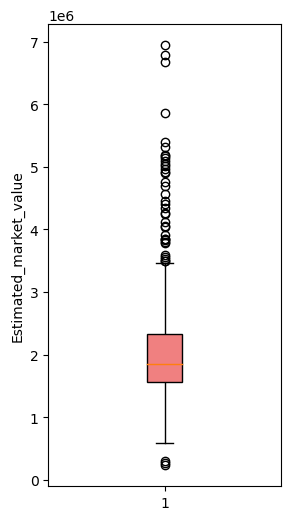

In [133]:
#boxplots
fig, ax = plt.subplots(figsize=(3, 6))
ax.boxplot(sc_df['Estimated_market_value'], patch_artist=True, boxprops=dict(facecolor='lightcoral'))
ax.set_ylabel('Estimated_market_value')
plt.show()
#seems like estimated market value has a lot of outliers, especially towards larger values

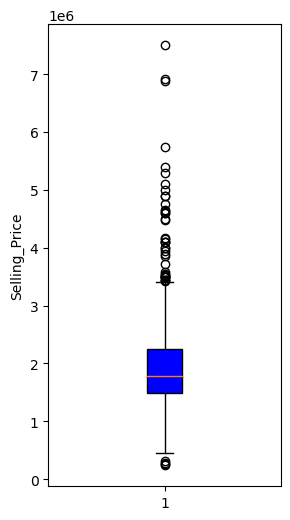

In [134]:
fig, ax = plt.subplots(figsize=(3, 6))
ax.boxplot(sc_df['Selling_Price'], patch_artist=True, boxprops=dict(facecolor='blue'))
ax.set_ylabel('Selling_Price')
plt.show()
#seems like Selling price has a lot of outliers, especially towards larger values

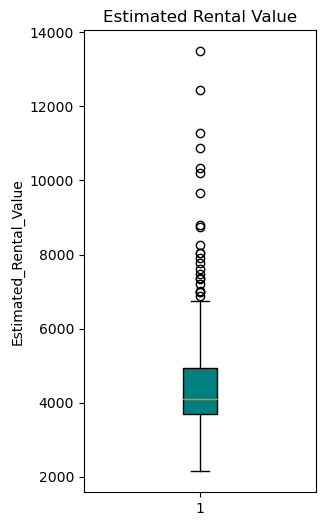

In [135]:
fig, ax = plt.subplots(figsize=(3,6))
ax.boxplot(sc_df['Estimated_Rental_Value'], patch_artist=True, boxprops=dict(facecolor='teal'))
ax.set_title('Estimated Rental Value')
ax.set_ylabel('Estimated_Rental_Value')
plt.show()
#all outliers for estimated rental value belong to the higher end values

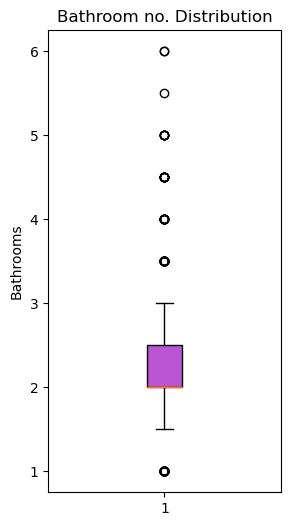

In [136]:
fig, ax = plt.subplots(figsize=(3, 6))
ax.boxplot(sc_df['Bathrooms'], patch_artist=True, boxprops=dict(facecolor='mediumorchid'))
ax.set_title('Bathroom no. Distribution')
ax.set_ylabel('Bathrooms')
plt.show()


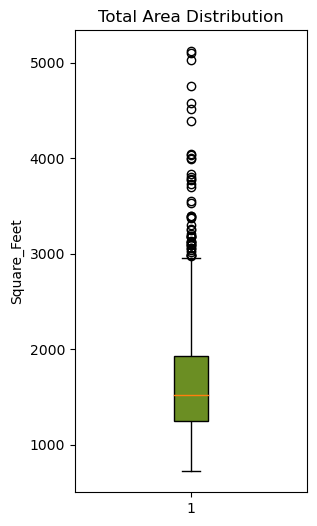

In [137]:
#lets see if square footage has outliers too
fig, ax = plt.subplots(figsize=(3, 6))
ax.boxplot(sc_df['Square_Feet'], patch_artist=True, boxprops=dict(facecolor='olivedrab'))
ax.set_title('Total Area Distribution')
ax.set_ylabel('Square_Feet')
plt.show()
#median is below 2000 sq.ft

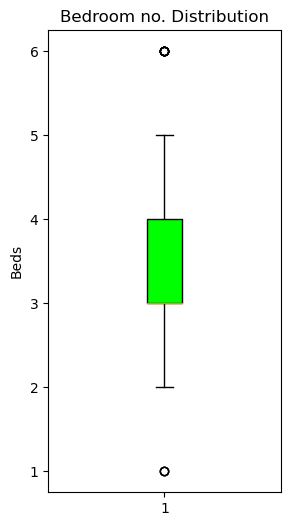

In [138]:
fig, ax = plt.subplots(figsize=(3, 6))
ax.boxplot(sc_df['Beds'], patch_artist=True, boxprops=dict(facecolor='lime'))
ax.set_title('Bedroom no. Distribution')
ax.set_ylabel('Beds')
plt.show()
#majority of the houses in dataset are 3br, but there are some 1,2,4,5,6 br houses too

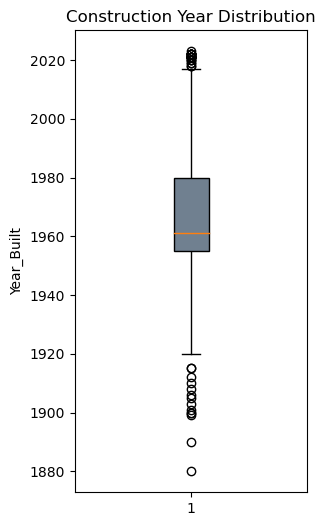

In [139]:
fig, ax = plt.subplots(figsize=(3, 6))
ax.boxplot(sc_df['Year_Built'], patch_artist=True, boxprops=dict(facecolor='slategrey'))
ax.set_title('Construction Year Distribution')
ax.set_ylabel('Year_Built')
plt.show()
#median year built is around 1963 

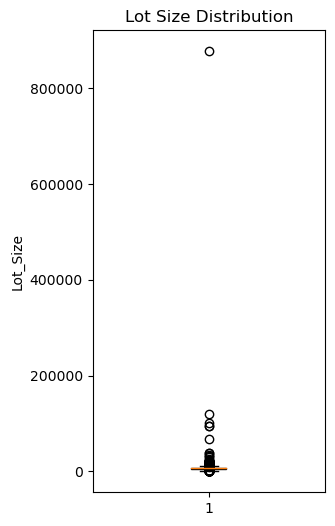

In [140]:
fig, ax = plt.subplots(figsize=(3, 6))
ax.boxplot(sc_df['Lot_Size'], patch_artist=True, boxprops=dict(facecolor='fuchsia'))
ax.set_title('Lot Size Distribution')
ax.set_ylabel('Lot_Size')
plt.show()
#thre is a lot size of over 8000000 sq.ft,  we are dealing with an estate or a farm type of property.

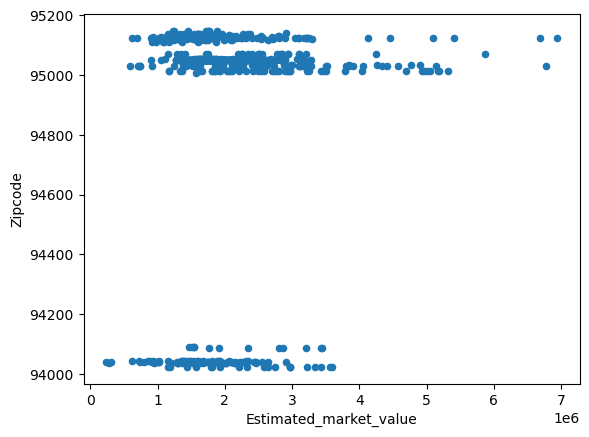

In [141]:
# Some scatter plots
sc_df.plot.scatter(x='Estimated_market_value', y='Zipcode', legend=False)
plt.show()
#apparently doesnt show any correlation

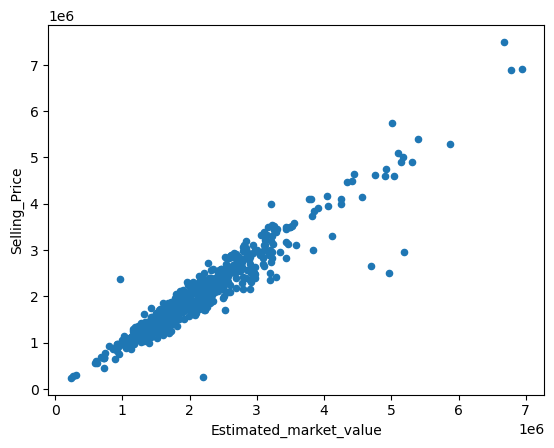

In [142]:
sc_df.plot.scatter(x='Estimated_market_value', y='Selling_Price', legend=False)
plt.show()
#these two variables very much related to each other, as was expected

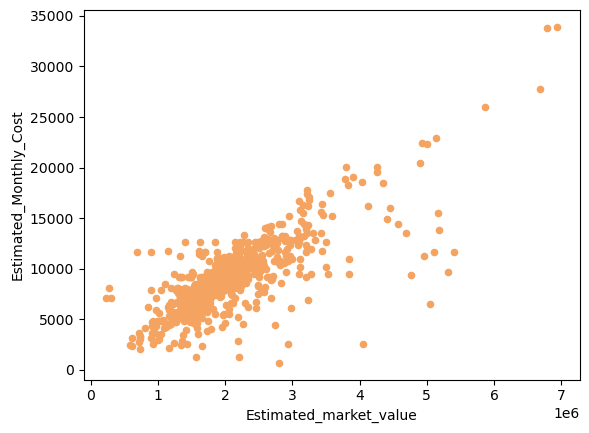

In [143]:
sc_df.plot.scatter(x='Estimated_market_value', y='Estimated_Monthly_Cost', c='sandybrown', legend=False)
ax.set_title('Estimated Market Value vs Estimated Monthly Cost')
ax.set_xlabel('Estimated Market Value')
ax.set_ylabel('Estimated Monthly Cost')
plt.show()
#these two variables show existing relationships too

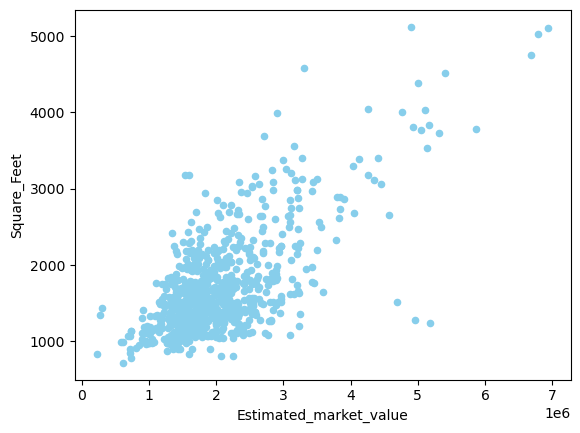

In [144]:
sc_df.plot.scatter(x='Estimated_market_value', y='Square_Feet', c='skyblue', legend=False)
ax.set_title('Estimated Market Value vs Size')
ax.set_xlabel('Estimated Market Value')
ax.set_ylabel('Square_Feet')
plt.show()
#certain positive relationships here too, between market value and the size

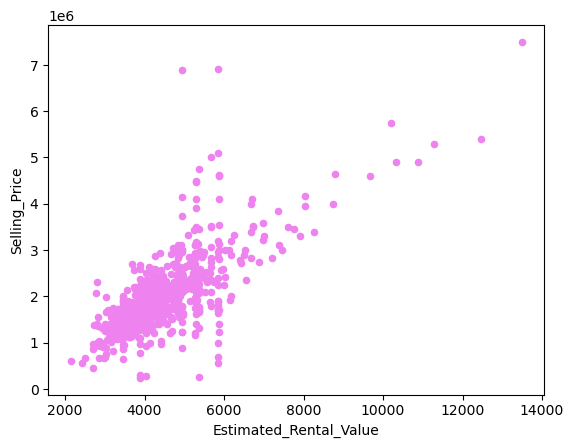

In [145]:
sc_df.plot.scatter(x='Estimated_Rental_Value', y='Selling_Price', c='violet', legend=False)
ax.set_title('Estimated Rental Value vs Price')
ax.set_xlabel('Estimated_Rental_Value')
ax.set_ylabel('Square_Feet')
plt.show()
#we can see certain relationships here too, but not as strong as was expected. We supposed, many other variables affect rental value apart from price of the house

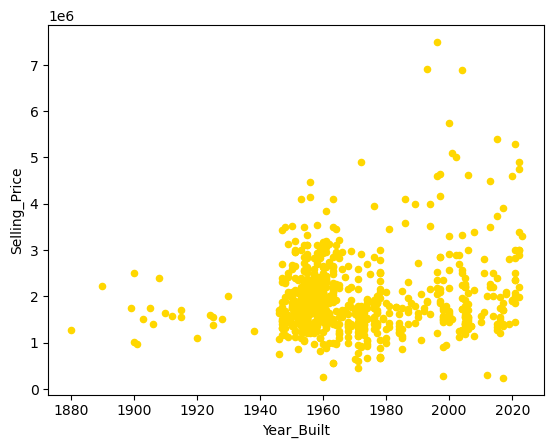

In [146]:
sc_df.plot.scatter(x='Year_Built', y='Selling_Price', c='gold', legend=False)
ax.set_title('Year of Construction vs Price')
ax.set_xlabel('Year_Built')
ax.set_ylabel('Selling_Price')
plt.show()
#interesting observation is that age of the house does not relate to its price

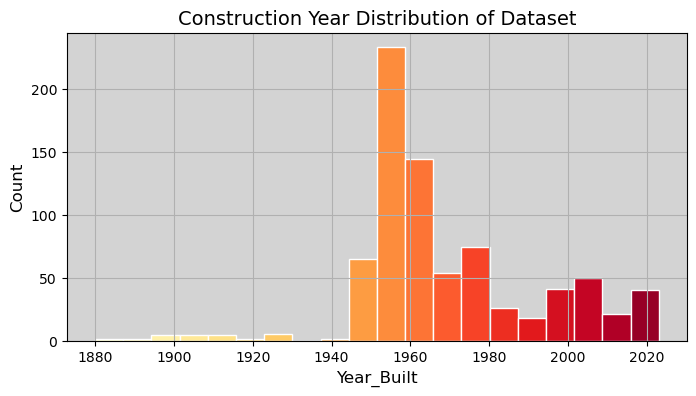

In [147]:
# dataset vizualization via histograms
# Creating a histogram of the year built column
fig, ax = plt.subplots(figsize=(8,4))
hist = sc_df['Year_Built'].hist(bins=20, edgecolor='white', linewidth=1)

# Setting the x and y labels
hist.set_xlabel('Year_Built', fontsize=12)
hist.set_ylabel('Count', fontsize=12)

# Setting the title of the plot
plt.title('Construction Year Distribution of Dataset', fontsize=14)

# Setting the grid to be visible
plt.grid(True)

# Setting the background color of the plot
plt.gca().set_facecolor('lightgray')

# Creating a gradient colormap
cmap = plt.cm.get_cmap('YlOrRd')

# Setting the color of the histogram bars
for i in range(len(hist.patches)):
    hist.patches[i].set_facecolor(cmap(i / len(hist.patches)))

# Showing the plot
plt.show()
#most of the houses built between 1950 and 1970. there are almost no houses sold that were built prior 1900

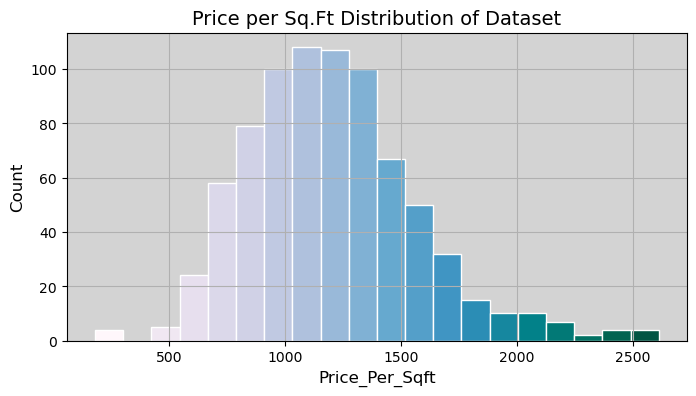

In [148]:
# Creating a histogram of the price per sq.ft column
fig, ax = plt.subplots(figsize=(8,4))
hist = sc_df['Price_Per_Sqft'].hist(bins=20, edgecolor='white', linewidth=1)

# Setting the x and y labels
hist.set_xlabel('Price_Per_Sqft', fontsize=12)
hist.set_ylabel('Count', fontsize=12)

# Setting the title of the plot
plt.title('Price per Sq.Ft Distribution of Dataset', fontsize=14)

# Setting the grid to be visible
plt.grid(True)

# Setting the background color of the plot
plt.gca().set_facecolor('lightgray')

# Creating a gradient colormap
cmap = plt.cm.get_cmap('PuBuGn')

# Setting the color of the histogram bars
for i in range(len(hist.patches)):
    hist.patches[i].set_facecolor(cmap(i / len(hist.patches)))

# Showing the plot
plt.show()
#most of the houses sold for sq.ft price between 900 and 1400 doll. Some houses, however, were sold at 2500doll per sq.f. And some are only for 500 doll per sq.ft

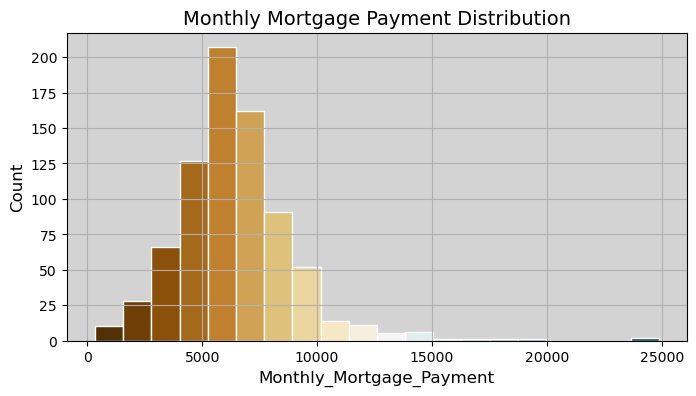

In [149]:
# Creating a histogram of the year built column
fig, ax = plt.subplots(figsize=(8,4))
hist = sc_df['Monthly_Mortgage_Payment'].hist(bins=20, edgecolor='white', linewidth=1)

# Setting the x and y labels
hist.set_xlabel('Monthly_Mortgage_Payment', fontsize=12)
hist.set_ylabel('Count', fontsize=12)

# Setting the title of the plot
plt.title('Monthly Mortgage Payment Distribution', fontsize=14)

# Setting the grid to be visible
plt.grid(True)

# Setting the background color of the plot
plt.gca().set_facecolor('lightgray')

# Creating a gradient colormap
cmap = plt.cm.get_cmap('BrBG')

# Setting the color of the histogram bars
for i in range(len(hist.patches)):
    hist.patches[i].set_facecolor(cmap(i / len(hist.patches)))

# Showing the plot
plt.show()
#most common monthly mortgage payment calculated by RedFin is 5000 to 6500 usd

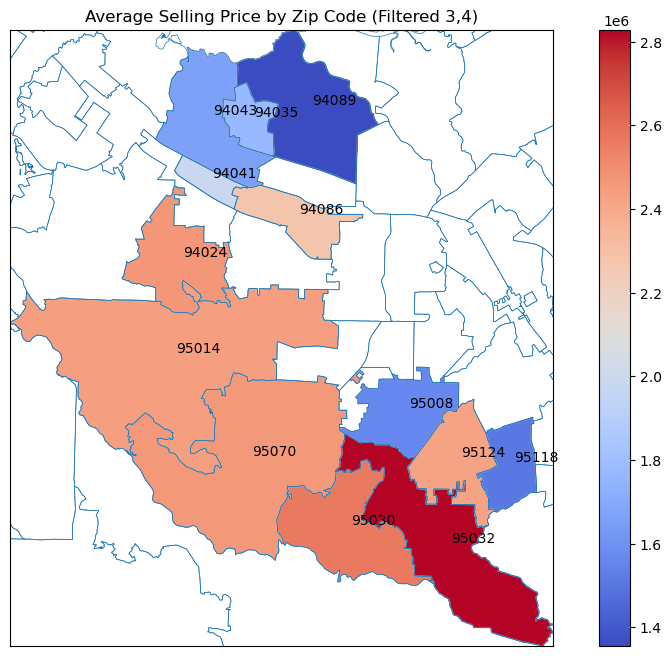

In [49]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

sc_df = pd.read_excel('cleaned_data2.xlsx')
#sc_df['Zipcode'] = sc_df['Zipcode'].astype(int).astype(str)

# Group the DataFrame by "ZipCode" and calculate the average selling price for each zip code
sc_df_filtered = sc_df[(sc_df["Beds"] == 3) | (sc_df["Beds"] == 4)]

#avg_selling_price_by_zip = sc_df.groupby("Zipcode")["Selling_Price"].mean().reset_index()
avg_selling_price_by_zip = sc_df_filtered.groupby("Zipcode")["Selling_Price"].mean().reset_index()

zip_code_shapes = gpd.read_file('/Users/monooprasad/Documents/BAN612/BAN612_Project/California_Zip_Codes/California_Zip_Codes.shp')
zip_code_shapes['ZIP_CODE'] = zip_code_shapes['ZIP_CODE'].astype(str)  # Convert the column to string
zip_codes_to_display=['94023', '94024', '94035', '94039', '94040', '94041', '94042', '94043', '94085', '94086', '94088', '94089', '94301', 
                      '94302', '94303', '94306', '94309', 
                      '95002', '95008', '95009', '95011', '95014',
                      '95015', '95030', '95031', '95032', '95033', '95070', '95071', '95118', '95124']

# Merge the average selling price data with the shapefile data using the "ZipCode" field
avg_selling_price_by_zip['Zipcode'] = avg_selling_price_by_zip['Zipcode'].astype(str)
merged_data = zip_code_shapes.merge(avg_selling_price_by_zip, left_on='ZIP_CODE', right_on='Zipcode', how='left')

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Filter merged_data to include only the zip codes in your list
merged_data_filtered = merged_data[merged_data['Zipcode'].isin(zip_codes_to_display)]

# Calculate the bounding box of the filtered zip codes
bbox = merged_data_filtered.total_bounds  # Returns [minx, miny, maxx, maxy]

# Set the extent of the plot to cover the bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Plot the zip code boundaries
zip_code_shapes.boundary.plot(ax=ax, linewidth=0.5)

# Plot the average selling price data for the filtered zip codes
merged_data_filtered.plot(column='Selling_Price', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each zip code on the plot
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['Zipcode']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color='black')

# Set plot title and labels
plt.title("Average Selling Price by Zip Code (Filtered 3,4)")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Show the plot
plt.show()



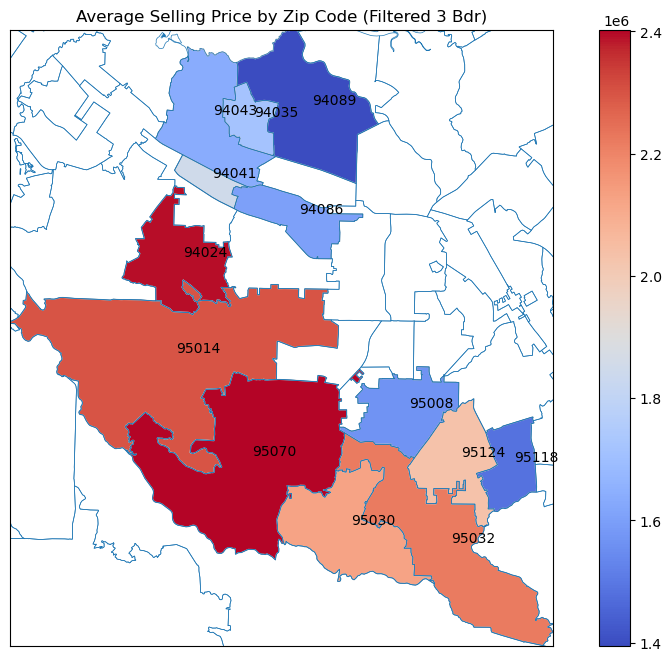

In [47]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (replace 'your_data.csv' with your actual data file)
# sc_df = pd.read_csv('your_data.csv')

# Group the DataFrame by "ZipCode" and calculate the average selling price for each zip code
sc_df_filtered = sc_df[(sc_df["Beds"] == 3)]

#avg_selling_price_by_zip = sc_df.groupby("Zipcode")["Selling_Price"].mean().reset_index()
avg_selling_price_by_zip = sc_df_filtered.groupby("Zipcode")["Selling_Price"].mean().reset_index()

# Load the shapefile containing zip code boundaries
zip_code_shapes = gpd.read_file('/Users/monooprasad/Documents/BAN612/BAN612_Project/California_Zip_Codes/California_Zip_Codes.shp')
zip_code_shapes['ZIP_CODE'] = zip_code_shapes['ZIP_CODE'].astype(str)  # Convert the column to string
zip_codes_to_display=['94023', '94024', '94035', '94039', '94040', '94041', '94042', '94043', '94085', '94086', '94088', '94089', '94301', 
                      '94302', '94303', '94306', '94309', 
                      '95002', '95008', '95009', '95011', '95014',
                      '95015', '95030', '95031', '95032', '95033', '95070', '95071', '95118', '95124']

# Merge the average selling price data with the shapefile data using the "ZipCode" field
avg_selling_price_by_zip['Zipcode'] = avg_selling_price_by_zip['Zipcode'].astype(str)
merged_data = zip_code_shapes.merge(avg_selling_price_by_zip, left_on='ZIP_CODE', right_on='Zipcode', how='left')

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Filter merged_data to include only the zip codes in your list
merged_data_filtered = merged_data[merged_data['Zipcode'].isin(zip_codes_to_display)]

# Calculate the bounding box of the filtered zip codes
bbox = merged_data_filtered.total_bounds  # Returns [minx, miny, maxx, maxy]

# Set the extent of the plot to cover the bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Plot the zip code boundaries
zip_code_shapes.boundary.plot(ax=ax, linewidth=0.5)

# Plot the average selling price data for the filtered zip codes
merged_data_filtered.plot(column='Selling_Price', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each zip code on the plot
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['Zipcode']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color='black')

# Set plot title and labels
plt.title("Average Selling Price by Zip Code (Filtered 3 Bdr)")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Show the plot
plt.show()

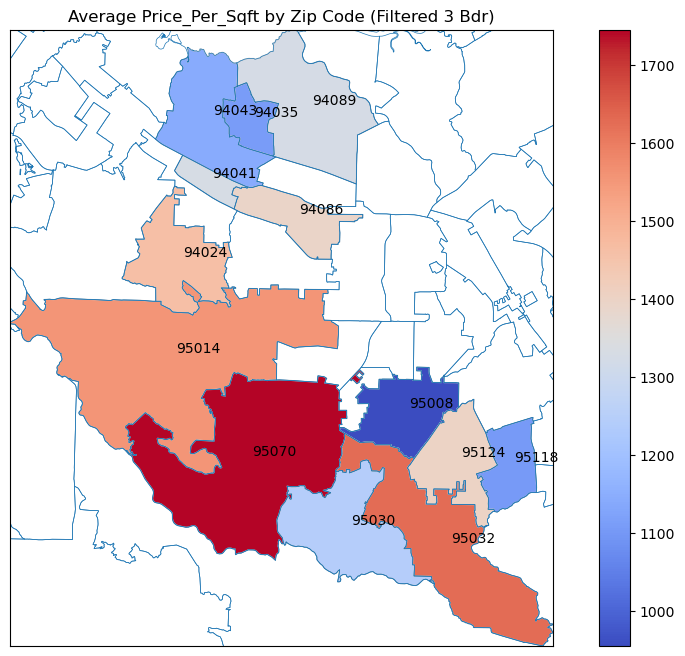

In [45]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (replace 'your_data.csv' with your actual data file)
# sc_df = pd.read_csv('your_data.csv')

# Group the DataFrame by "ZipCode" and calculate the average selling price for each zip code
sc_df_filtered = sc_df[(sc_df["Beds"] == 3)]

#avg_selling_price_by_zip = sc_df.groupby("Zipcode")["Selling_Price"].mean().reset_index()
avg_selling_price_by_zip = sc_df_filtered.groupby("Zipcode")["Price_Per_Sqft"].mean().reset_index()

# Load the shapefile containing zip code boundaries
zip_code_shapes = gpd.read_file('/Users/monooprasad/Documents/BAN612/BAN612_Project/California_Zip_Codes/California_Zip_Codes.shp')
zip_code_shapes['ZIP_CODE'] = zip_code_shapes['ZIP_CODE'].astype(str)  # Convert the column to string
zip_codes_to_display=['94023', '94024', '94035', '94039', '94040', '94041', '94042', '94043', '94085', '94086', '94088', '94089', '94301', 
                      '94302', '94303', '94306', '94309', 
                      '95002', '95008', '95009', '95011', '95014',
                      '95015', '95030', '95031', '95032', '95033', '95070', '95071', '95118', '95124']

# Merge the average selling price data with the shapefile data using the "ZipCode" field
avg_selling_price_by_zip['Zipcode'] = avg_selling_price_by_zip['Zipcode'].astype(str)
merged_data = zip_code_shapes.merge(avg_selling_price_by_zip, left_on='ZIP_CODE', right_on='Zipcode', how='left')

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Filter merged_data to include only the zip codes in your list
merged_data_filtered = merged_data[merged_data['Zipcode'].isin(zip_codes_to_display)]

# Calculate the bounding box of the filtered zip codes
bbox = merged_data_filtered.total_bounds  # Returns [minx, miny, maxx, maxy]

# Set the extent of the plot to cover the bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Plot the zip code boundaries
zip_code_shapes.boundary.plot(ax=ax, linewidth=0.5)

# Plot the average selling price data for the filtered zip codes
merged_data_filtered.plot(column='Price_Per_Sqft', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each zip code on the plot
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['Zipcode']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color='black')

# Set plot title and labels
plt.title("Average Price_Per_Sqft by Zip Code (Filtered 3 Bdr)")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Show the plot
plt.show()

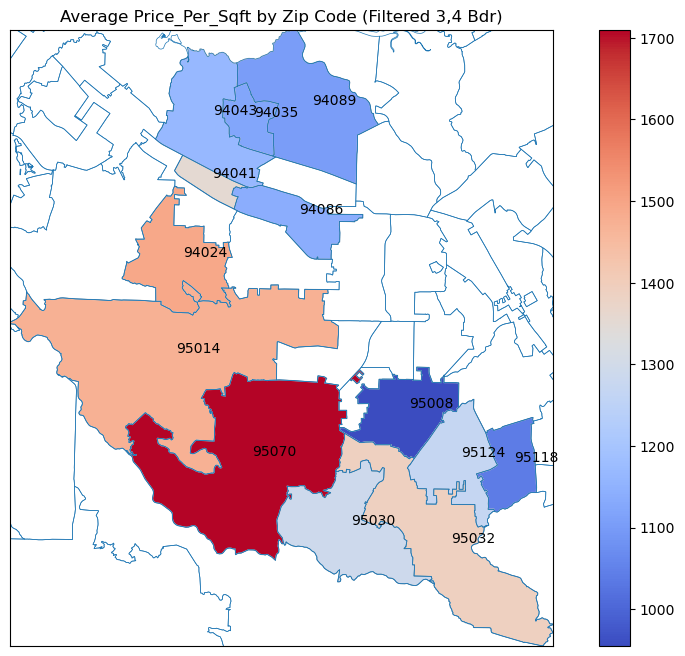

In [48]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrame (replace 'your_data.csv' with your actual data file)
# sc_df = pd.read_csv('your_data.csv')

# Group the DataFrame by "ZipCode" and calculate the average selling price for each zip code
sc_df_filtered = sc_df[((sc_df["Beds"] == 3) | (sc_df["Beds"] == 4))]

#avg_selling_price_by_zip = sc_df.groupby("Zipcode")["Selling_Price"].mean().reset_index()
avg_selling_price_by_zip = sc_df_filtered.groupby("Zipcode")["Price_Per_Sqft"].mean().reset_index()

# Load the shapefile containing zip code boundaries
zip_code_shapes = gpd.read_file('/Users/monooprasad/Documents/BAN612/BAN612_Project/California_Zip_Codes/California_Zip_Codes.shp')
zip_code_shapes['ZIP_CODE'] = zip_code_shapes['ZIP_CODE'].astype(str)  # Convert the column to string
zip_codes_to_display=['94023', '94024', '94035', '94039', '94040', '94041', '94042', '94043', '94085', '94086', '94088', '94089', '94301', 
                      '94302', '94303', '94306', '94309', 
                      '95002', '95008', '95009', '95011', '95014',
                      '95015', '95030', '95031', '95032', '95033', '95070', '95071', '95118', '95124']

# Merge the average selling price data with the shapefile data using the "ZipCode" field
avg_selling_price_by_zip['Zipcode'] = avg_selling_price_by_zip['Zipcode'].astype(str)
merged_data = zip_code_shapes.merge(avg_selling_price_by_zip, left_on='ZIP_CODE', right_on='Zipcode', how='left')

# Create a plot
fig, ax = plt.subplots(1, figsize=(12, 8))

# Filter merged_data to include only the zip codes in your list
merged_data_filtered = merged_data[merged_data['Zipcode'].isin(zip_codes_to_display)]

# Calculate the bounding box of the filtered zip codes
bbox = merged_data_filtered.total_bounds  # Returns [minx, miny, maxx, maxy]

# Set the extent of the plot to cover the bounding box
ax.set_xlim(bbox[0], bbox[2])
ax.set_ylim(bbox[1], bbox[3])

# Plot the zip code boundaries
zip_code_shapes.boundary.plot(ax=ax, linewidth=0.5)

# Plot the average selling price data for the filtered zip codes
merged_data_filtered.plot(column='Price_Per_Sqft', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate each zip code on the plot
for x, y, label in zip(merged_data_filtered.geometry.centroid.x, merged_data_filtered.geometry.centroid.y, merged_data_filtered['Zipcode']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=10, color='black')

# Set plot title and labels
plt.title("Average Price_Per_Sqft by Zip Code (Filtered 3,4 Bdr)")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])  # Remove x-axis labels
ax.set_yticks([])  # Remove y-axis labels

# Show the plot
plt.show()

In [1]:
import pandas as pd

# Assuming you have already loaded your DataFrame
sc_df = pd.read_excel('cleaned_data2.xlsx')

sc_df_filtered = sc_df[sc_df["Beds"] == 3]

# Group the filtered DataFrame by "Company_Adj" and calculate the average "Price_Per_Sqft" for each group
avg_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Price_Per_Sqft"].mean()

avg_sales_by_company_df = pd.DataFrame({'Average Price_Per_Sqft': avg_sales_by_company.map('${:.2f}'.format)})

# Display the DataFrame
display(avg_sales_by_company_df)

# Calculate the percentage difference between 'Company' and 'Company_Adj' for specific companies
companies_to_compare = ['Apple', 'Alphabet', 'Netflix']

for company in companies_to_compare:
    company_avg_price = float(avg_sales_by_company_df.loc[company]['Average Price_Per_Sqft'].replace('$', '').replace(',', ''))
    company_adj_avg_price = float(avg_sales_by_company_df.loc[company + '_Adj']['Average Price_Per_Sqft'].replace('$', '').replace(',', ''))

    percentage_difference = ((company_avg_price - company_adj_avg_price) / company_avg_price) * 100

    print(f'Percentage Difference between {company} and {company}_Adj: {percentage_difference:.2f}%')


,Average Price_Per_Sqft
Company_Adj,
Alphabet,$1141.73
Alphabet_Adj,$1249.65
Apple,$1554.12
Apple_Adj,$1639.06
Netflix,$1628.00
Netflix_Adj,$1237.44


Percentage Difference between Apple and Apple_Adj: -5.47%
Percentage Difference between Alphabet and Alphabet_Adj: -9.45%
Percentage Difference between Netflix and Netflix_Adj: 23.99%


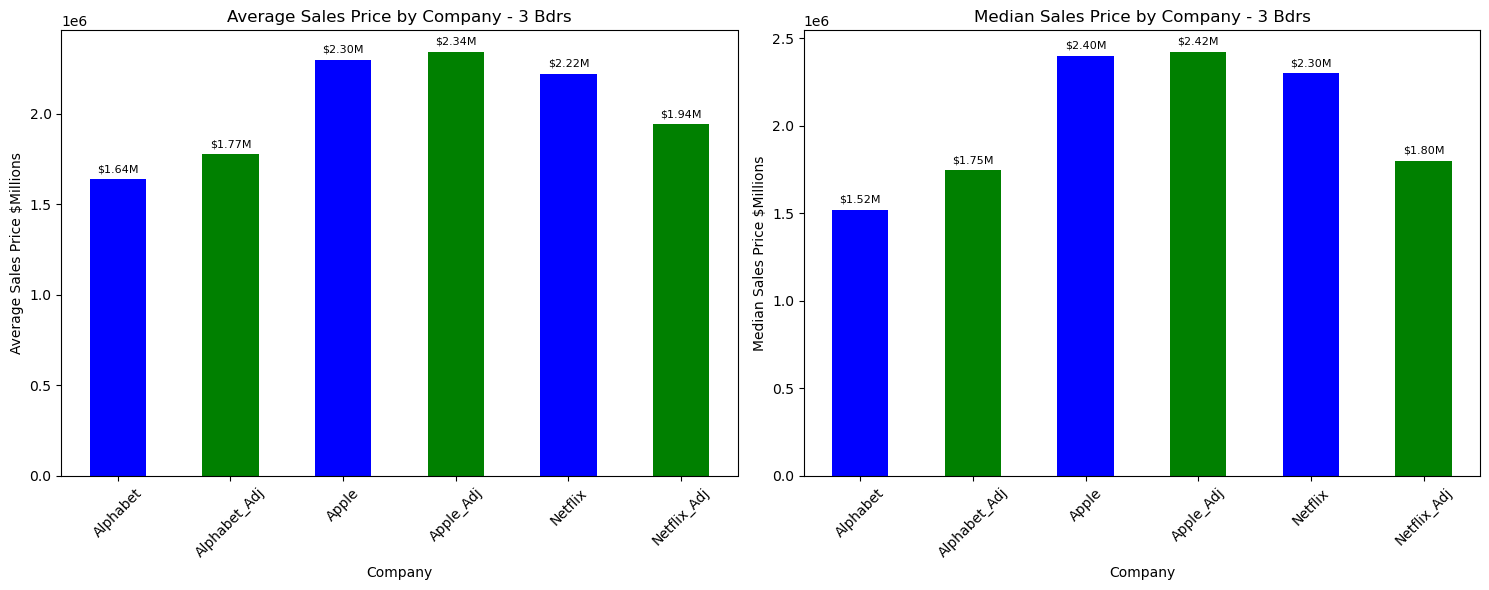

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame
sc_df = pd.read_excel('cleaned_data2.xlsx')
sc_df_filtered = sc_df[(sc_df["Beds"] == 3)]

# Group the DataFrame by "Company_Adj" and calculate the average and median sales price for each group
avg_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Selling_Price"].mean()
median_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Selling_Price"].median()

# Create a list of colors (blue and green) to use for the bars
colors = ['blue', 'green'] * ((len(avg_sales_by_company) // 2) + 1)

# Create a figure with two subplots (one for mean, one for median)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the average sales price
avg_sales_by_company.plot(kind="bar", color=colors, ax=ax1)
ax1.set_title("Average Sales Price by Company - 3 Bdrs")
ax1.set_xlabel("Company")
ax1.set_ylabel("Average Sales Price $Millions")
ax1.set_xticklabels(avg_sales_by_company.index, rotation=45)

# Add labels to each data point on the average sales price plot
for idx, value in enumerate(avg_sales_by_company):
    formatted_value = "${:.2f}M".format(value / 1000000)
    ax1.annotate(formatted_value, (idx, value), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Plot the median sales price
median_sales_by_company.plot(kind="bar", color=colors, ax=ax2)
ax2.set_title("Median Sales Price by Company - 3 Bdrs")
ax2.set_xlabel("Company")
ax2.set_ylabel("Median Sales Price $Millions")
ax2.set_xticklabels(median_sales_by_company.index, rotation=45)

# Add labels to each data point on the median sales price plot
for idx, value in enumerate(median_sales_by_company):
    formatted_value = "${:.2f}M".format(value / 1000000)
    ax2.annotate(formatted_value, (idx, value), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



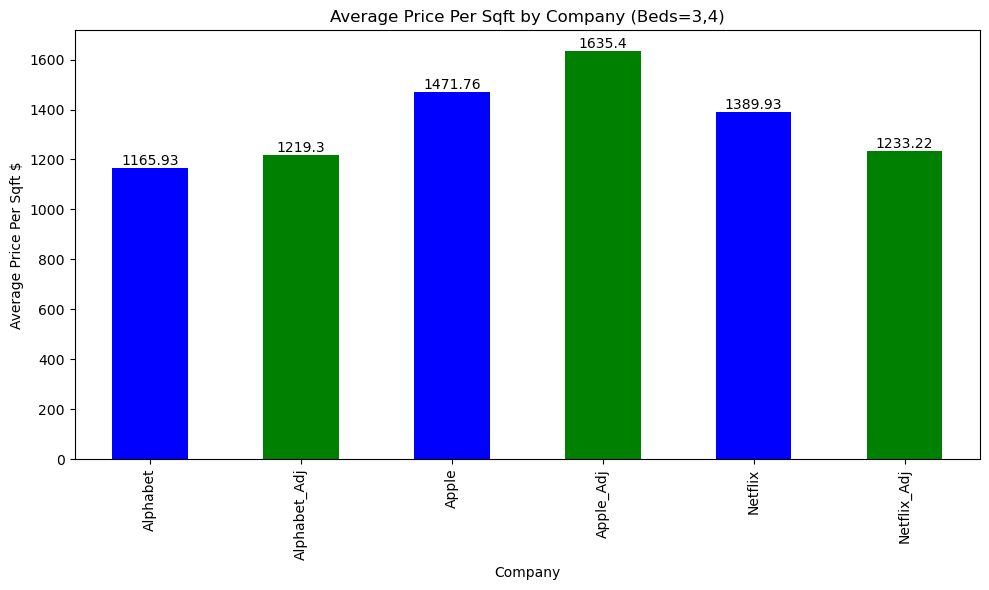

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame
# sc_df = pd.read_excel('cleaned_data.xlsx')

# Filter the DataFrame to only include rows where "Beds" equals 3
# sc_df_filtered = sc_df[ sc_df["Beds"] == 3] 

sc_df_filtered = sc_df[(sc_df["Beds"] == 3) | (sc_df["Beds"] == 4)]
 
# Group the filtered DataFrame by "Company_Adj" and calculate the average sales price for each group
avg_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Price_Per_Sqft"].mean()

# Create a new DataFrame to capture the values by "Company_Adj"
avg_price_per_sqft_df = pd.DataFrame({"Company_Adj": avg_sales_by_company.index, "Avg_Price_Per_Sqft": avg_sales_by_company.values})
colors = ['blue', 'green'] * ((len(avg_sales_by_company) // 2) + 1)

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = avg_sales_by_company.plot(kind="bar", color=colors)
#plt.title("Average Price Per Sqft by Company (Beds=3)")
plt.title("Average Price Per Sqft by Company (Beds=3,4)")
plt.xlabel("Company")
plt.ylabel("Average Price Per Sqft $")

# Add labels to the bars
for bar, label in zip(bars.patches, avg_sales_by_company.round(2).astype(str)):
    height = bar.get_height()
    plt.annotate(label, (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

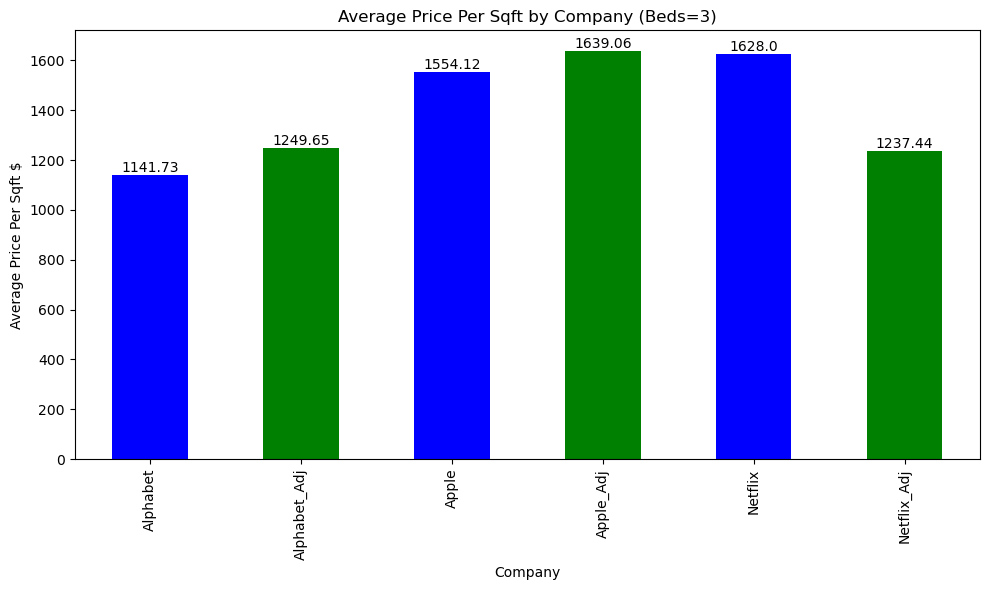

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame
# sc_df = pd.read_excel('cleaned_data.xlsx')

# Filter the DataFrame to only include rows where "Beds" equals 3
# sc_df_filtered = sc_df[ sc_df["Beds"] == 3] 

sc_df_filtered = sc_df[(sc_df["Beds"] == 3)]
 
# Group the filtered DataFrame by "Company_Adj" and calculate the average sales price for each group
avg_sales_by_company = sc_df_filtered.groupby("Company_Adj")["Price_Per_Sqft"].mean()

# Create a new DataFrame to capture the values by "Company_Adj"
avg_price_per_sqft_df = pd.DataFrame({"Company_Adj": avg_sales_by_company.index, "Avg_Price_Per_Sqft": avg_sales_by_company.values})
colors = ['blue', 'green'] * ((len(avg_sales_by_company) // 2) + 1)

# Create a bar plot with custom colors
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = avg_sales_by_company.plot(kind="bar", color=colors)
#plt.title("Average Price Per Sqft by Company (Beds=3)")
plt.title("Average Price Per Sqft by Company (Beds=3)")
plt.xlabel("Company")
plt.ylabel("Average Price Per Sqft $")

# Add labels to the bars
for bar, label in zip(bars.patches, avg_sales_by_company.round(2).astype(str)):
    height = bar.get_height()
    plt.annotate(label, (bar.get_x() + bar.get_width() / 2, height), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()